**Rede neural com mesmo de neurônios utilizado no artigo.**

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import random
%matplotlib inline

In [35]:
!git clone http://github.com/rodolfojbrandao/PhD
%cd PhD

fatal: destination path 'PhD' already exists and is not an empty directory.
/content/PhD/PhD/PhD/PhD


In [0]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [0]:
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [38]:
DAT=pd.read_csv("trabalho01redes2.csv")
print(DAT)

    pressure  temperature  co2        is
0        100           60  0.3  0.043365
1        300           50  0.2  0.068071
2        200           40  0.4  0.072746
3        200           60  0.2  0.061583
4        200           40  0.2  0.047607
5        300           60  0.3  0.100949
6        100           50  0.4  0.055266
7        100           50  0.2  0.026984
8        300           40  0.3  0.070051
9        200           60  0.4  0.133478
10       200           50  0.3  0.087583
11       100           40  0.3  0.021871
12       200           50  0.3  0.083618
13       200           50  0.3  0.071142
14       300           50  0.4  0.121988
15       300           50  0.3  0.056339
16       100           50  0.3  0.035870


In [39]:
# separa os dados em normatizados e originais
DAT_OLD=[]
# Guarda os dados antes de serem normatizados, para que não sejam perdidos
DAT_OLD=DAT.copy()
DAT=Normatiza(DAT)
print(DAT.head())
print('================================================================')
print(DAT_OLD.head())

   pressure  temperature           co2        is
0      -1.0          1.0 -5.551115e-16 -0.614822
1       1.0          0.0 -1.000000e+00 -0.172102
2       0.0         -1.0  1.000000e+00 -0.088311
3       0.0          1.0 -1.000000e+00 -0.288359
4       0.0         -1.0 -1.000000e+00 -0.538814
   pressure  temperature  co2        is
0       100           60  0.3  0.043365
1       300           50  0.2  0.068071
2       200           40  0.4  0.072746
3       200           60  0.2  0.061583
4       200           40  0.2  0.047607


In [40]:
# separa os dados em treino e teste
train=DAT.sample(frac=0.8,random_state=None) # poderia ser frac=0.5? sim ou nao?
test=DAT.drop(train.index)
#train e test possui tanto x (entrada/independente) quanto y (saida/dependente)
print(train.head())
print("===================================================================")
print(train.shape[0]) #mostrar o numero de linhas
print("===================================================================")
print(test.head())
print("===================================================================")
print(test.shape[0])

    pressure  temperature           co2        is
3        0.0          1.0 -1.000000e+00 -0.288359
11      -1.0         -1.0 -5.551115e-16 -1.000000
12       0.0          0.0 -5.551115e-16  0.106507
7       -1.0          0.0 -1.000000e+00 -0.908361
14       1.0          0.0  1.000000e+00  0.794089
14
    pressure  temperature           co2        is
1        1.0          0.0 -1.000000e+00 -0.172102
10       0.0          0.0 -5.551115e-16  0.177555
15       1.0          0.0 -5.551115e-16 -0.382332
3


In [41]:
# obtem as variaveis independentes (treino e teste)
x_train=train.iloc[:,[0,1,2]]
x_test=test.iloc[:,[0,1,2]]
X_OLD=DAT_OLD.iloc[:,[0,1,2]]
print(x_test.head())
print('================================================================')
print(x_train.head())
print('================================================================')
print(X_OLD.head())

    pressure  temperature           co2
1        1.0          0.0 -1.000000e+00
10       0.0          0.0 -5.551115e-16
15       1.0          0.0 -5.551115e-16
    pressure  temperature           co2
3        0.0          1.0 -1.000000e+00
11      -1.0         -1.0 -5.551115e-16
12       0.0          0.0 -5.551115e-16
7       -1.0          0.0 -1.000000e+00
14       1.0          0.0  1.000000e+00
   pressure  temperature  co2
0       100           60  0.3
1       300           50  0.2
2       200           40  0.4
3       200           60  0.2
4       200           40  0.2


In [42]:
# obtem as variaveis dependentes (treino e teste)
Index=[3]
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]
print(y_test.head())
print('================================================================')
print(y_train.head())
print('================================================================')
print(Y_OLD.head())

          is
1  -0.172102
10  0.177555
15 -0.382332
          is
3  -0.288359
11 -1.000000
12  0.106507
7  -0.908361
14  0.794089
         is
0  0.043365
1  0.068071
2  0.072746
3  0.061583
4  0.047607


In [43]:
clf = MLPRegressor(solver='lbfgs',activation='logistic',alpha=1e-5,hidden_layer_sizes=(8), random_state=None)
clf.fit(x_train, y_train)
y_calc_train=clf.predict(x_train)
y_calc_test=clf.predict(x_test)
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)
test=[]
train=[]
train=Original(y_train,Y_OLD)
test=Original(y_test,Y_OLD)
resist_obs_train=[]
resist_calc_train=[]
resist_calc_train=y_calc_train['is'].copy()
resist_obs_train=train['is'].copy()
resist_obs_test=[]
resist_calc_test=[]
resist_calc_test=y_calc_test['is'].copy()
resist_obs_test=test['is'].copy()
print('===== TREINAMENTO SUPERIOR =====')
mse=mean_squared_error(resist_obs_train,resist_calc_train)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train,resist_calc_train)
print("R^2 treino=",R2)
print('===== TESTE SUPERIOR =====')
mse=mean_squared_error(resist_obs_test,resist_calc_test)
print("MSE teste=",mse)
R2=r2_score(resist_obs_test,resist_calc_test)
print("R^2 teste=",R2)

===== TREINAMENTO SUPERIOR =====
MSE treino= 5.5679789065118555e-06
R^2 treino= 0.9946735347887543
===== TESTE SUPERIOR =====
MSE teste= 0.0005301421879036137
R^2 teste= -2.1924825686887996


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


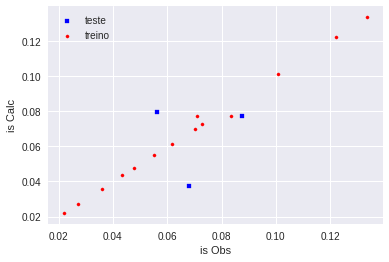

In [44]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)#mostra dois graficos sob o mesmo eixo 

ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train,resist_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('is Calc')
plt.xlabel('is Obs')
plt.show()